# União das saídas JNose + CK

In [416]:
# Importando as bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [417]:
# Carregando o arquivo 
# O dataset contém 43 colunas: 42 features + label
dataset = pd.read_csv("../Dados/classes-reduced.csv")

# Tratamento da label: No smell (0), AR (1), ET (2), CTL (3), VT (4) 
dataset['CLASS'] = dataset['CLASS'].replace('No smell',0)
dataset['CLASS'] = dataset['CLASS'].replace('AR',1)
dataset['CLASS'] = dataset['CLASS'].replace('ET',2)
dataset['CLASS'] = dataset['CLASS'].replace('CTL',3)
dataset['CLASS'] = dataset['CLASS'].replace('VT',4)

In [418]:
# Substituindo NaNs por media dos valores da coluna
allColumnsWithoutLabel = dataset.columns[:-1]
for column in allColumnsWithoutLabel:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

In [ ]:
# Descriptive statistics
dataset.describe()

In [ ]:
# Boxplot de todo o dataset
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=dataset, orient="h", palette="Set2")

In [419]:
# Outliers imputation tecnique utilizando outliers do boxplot
def imputation():
    for column in allColumnsWithoutLabel:
        remove_out = np.where(np.in1d(dataset[column], 
                                    boxplot_stats(dataset[column]).pop(0)['fliers']))
        dataset.loc[remove_out[0], column] = dataset[column].mean()

# Imputation Luana
def imputation2():
    for column in allColumnsWithoutLabel:
        outliers_index_list = np.where(np.in1d(dataset[column], boxplot_stats(dataset[column]).pop(0)['fliers']))
        q3 = dataset[column].quantile(0.9)
        q1 = dataset[column].quantile(0.1)
        for i in outliers_index_list[0]:
            instance_value = dataset[column].loc[i]
            if instance_value > q3:
                dataset[column] = dataset[column].replace(instance_value, q3)
            if instance_value < q1:
                dataset[column] = dataset[column].replace(instance_value, q1)

In [420]:
# Aplicando imputation considerando os outliers obtidos do boxplot
# imputation()

# Imputation de Luana usando IQR (ficou melhor)
imputation2()

In [421]:
# Estas são as métricas que não estão totalmente balanceadas, por isso acabei removendo, dependendo podemos substituir por outras
dataset = dataset.drop(['comparisonsQty'], axis=1)
dataset = dataset.drop(['parenthesizedExpsQty'], axis=1)
dataset = dataset.drop(['lambdasQty'], axis=1)

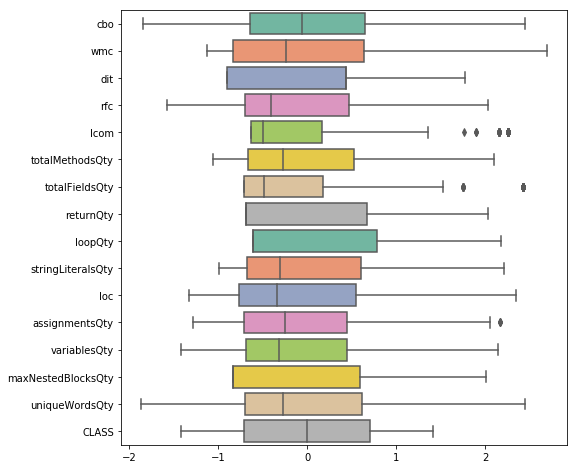

In [422]:
# Normalizando dataset e plotando boxplot novamente
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().fit(dataset)
scaler = StandardScaler().fit(dataset)
norm_subset = pd.DataFrame(scaler.transform(dataset), columns = dataset.columns)
a = round(norm_subset.describe(), 2)

fig, ax = plt.subplots(figsize=(8,8)) 
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

In [402]:
dataset.shape

(500, 16)

[Text(0.5, 0, 'cbo'),
 Text(1.5, 0, 'wmc'),
 Text(2.5, 0, 'dit'),
 Text(3.5, 0, 'rfc'),
 Text(4.5, 0, 'lcom'),
 Text(5.5, 0, 'tcc'),
 Text(6.5, 0, 'lcc'),
 Text(7.5, 0, 'totalMethodsQty'),
 Text(8.5, 0, 'staticMethodsQty'),
 Text(9.5, 0, 'publicMethodsQty'),
 Text(10.5, 0, 'privateMethodsQty'),
 Text(11.5, 0, 'protectedMethodsQty'),
 Text(12.5, 0, 'defaultMethodsQty'),
 Text(13.5, 0, 'visibleMethodsQty'),
 Text(14.5, 0, 'abstractMethodsQty'),
 Text(15.5, 0, 'finalMethodsQty'),
 Text(16.5, 0, 'synchronizedMethodsQty'),
 Text(17.5, 0, 'totalFieldsQty'),
 Text(18.5, 0, 'staticFieldsQty'),
 Text(19.5, 0, 'publicFieldsQty'),
 Text(20.5, 0, 'privateFieldsQty'),
 Text(21.5, 0, 'protectedFieldsQty'),
 Text(22.5, 0, 'defaultFieldsQty'),
 Text(23.5, 0, 'finalFieldsQty'),
 Text(24.5, 0, 'synchronizedFieldsQty'),
 Text(25.5, 0, 'nosi'),
 Text(26.5, 0, 'loc'),
 Text(27.5, 0, 'returnQty'),
 Text(28.5, 0, 'loopQty'),
 Text(29.5, 0, 'comparisonsQty'),
 Text(30.5, 0, 'tryCatchQty'),
 Text(31.5, 0, 'par

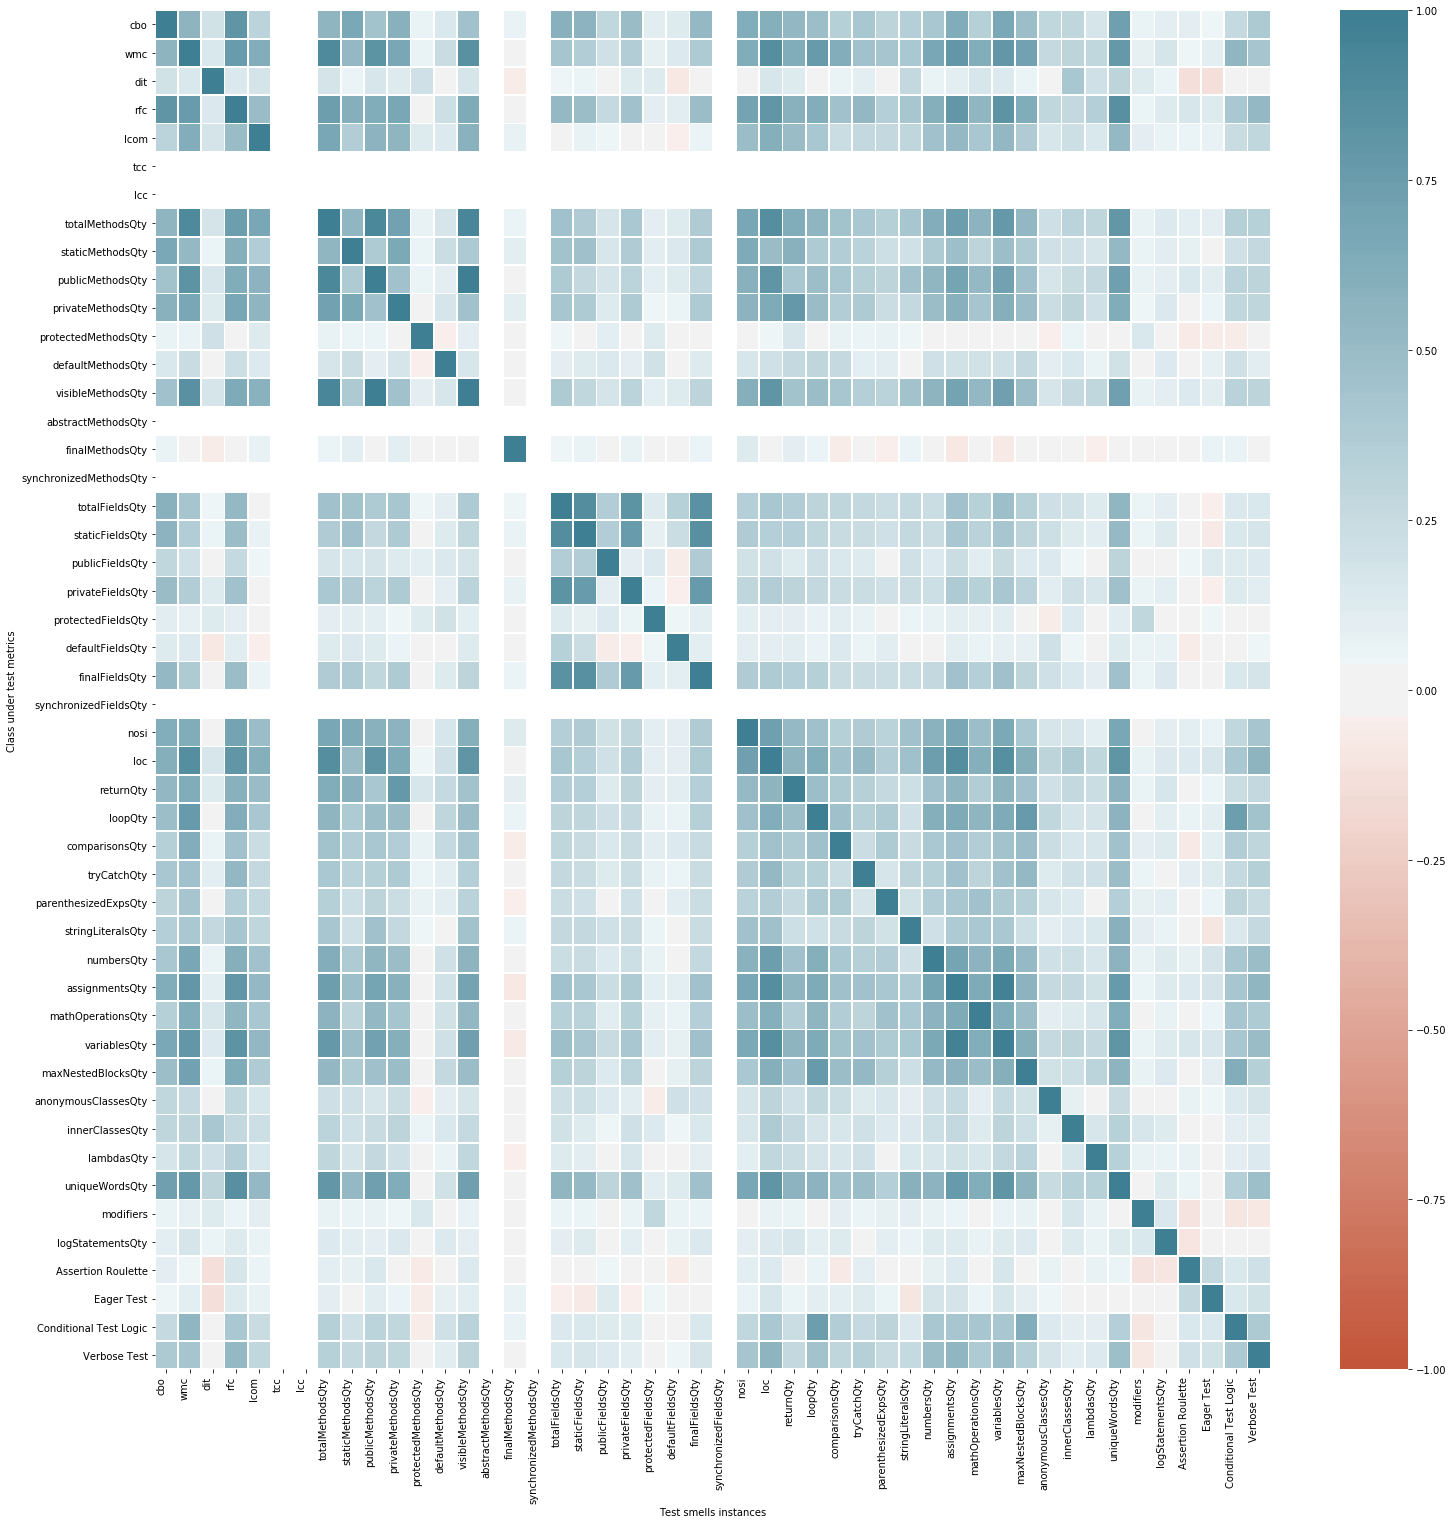

In [404]:
# Só vendo as correlações
#corr = norm_subset.corr(method='spearman').iloc[0:42, 42:]
corr = dataset4.corr(method='spearman')

fig, ax = plt.subplots(figsize=(25,25))
    
ax = sns.heatmap(
    corr, 
    linewidths=.8,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=False
)
plt.ylabel('Class under test metrics')
plt.xlabel('Test smells instances')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)